<a href="https://colab.research.google.com/github/ichhitsapkota143/Machine-Learning/blob/main/Day19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **One Hot Encoding**
One Hot Encoding is a method used to convert categorical data into a numerical format that machine learning models can work with.

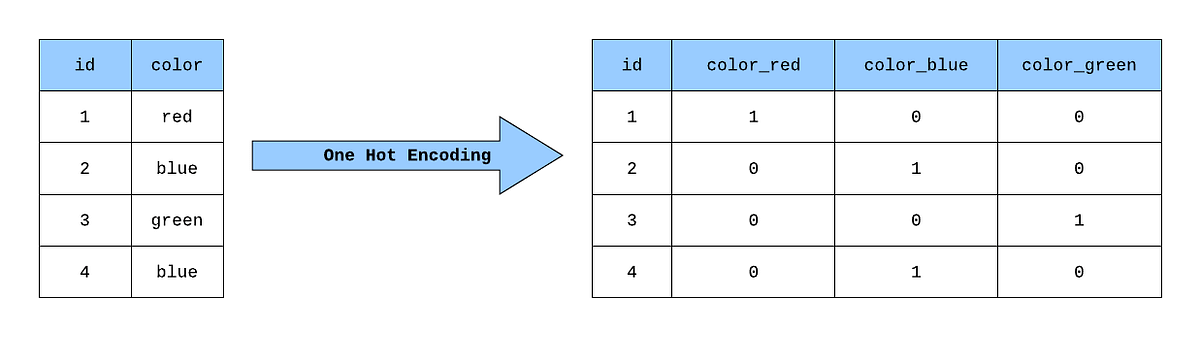

# **Dummy Variable Trap**
When we use one-hot encoding, we create extra columns for categories.
If we keep all those columns, one column can be easily guessed using the others.

This causes confusion for machine learning models because they think some columns are too related (not independent).

Dummy Variable Trap = having too many unnecessary columns after one-hot encoding.

# **Multicollinearity:**
Multicollinearity means two or more features (columns) are strongly related to each other.
It’s like saying the same thing twice in different ways.

This confuses the model because it doesn’t know which feature is truly important.

In [1]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('cars.csv')
df.head()

,brand,km_driven,fuel,owner,selling_price
0,Maruti,145500,Diesel,First Owner,450000
1,Skoda,120000,Diesel,Second Owner,370000
2,Honda,140000,Petrol,Third Owner,158000
3,Hyundai,127000,Diesel,First Owner,225000
4,Maruti,120000,Petrol,First Owner,130000


In [4]:
df['brand'].value_counts()

,count
brand,
Maruti,2448
Hyundai,1415
Mahindra,772
Tata,734
Toyota,488
Honda,467
Ford,397
Chevrolet,230
Renault,228


In [8]:
df['fuel'].value_counts()

,count
fuel,
Diesel,4402
Petrol,3631
CNG,57
LPG,38


In [9]:
df['owner'].value_counts()

,count
owner,
First Owner,5289
Second Owner,2105
Third Owner,555
Fourth & Above Owner,174
Test Drive Car,5


# **OneHotEncoding using Pandas**

In [10]:
#get_dummies
pd.get_dummies(df,columns=['fuel','owner'])

,brand,km_driven,selling_price,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti,145500,450000,False,True,False,False,True,False,False,False,False
1,Skoda,120000,370000,False,True,False,False,False,False,True,False,False
2,Honda,140000,158000,False,False,False,True,False,False,False,False,True
3,Hyundai,127000,225000,False,True,False,False,True,False,False,False,False
4,Maruti,120000,130000,False,False,False,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,110000,320000,False,False,False,True,True,False,False,False,False
8124,Hyundai,119000,135000,False,True,False,False,False,True,False,False,False
8125,Maruti,120000,382000,False,True,False,False,True,False,False,False,False
8126,Tata,25000,290000,False,True,False,False,True,False,False,False,False


# K-1 OneHotEncoding
#(multicolinearity)

In [11]:
pd.get_dummies(df,columns=['fuel','owner'],drop_first=True)

,brand,km_driven,selling_price,fuel_Diesel,fuel_LPG,fuel_Petrol,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti,145500,450000,True,False,False,False,False,False,False
1,Skoda,120000,370000,True,False,False,False,True,False,False
2,Honda,140000,158000,False,False,True,False,False,False,True
3,Hyundai,127000,225000,True,False,False,False,False,False,False
4,Maruti,120000,130000,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai,110000,320000,False,False,True,False,False,False,False
8124,Hyundai,119000,135000,True,False,False,True,False,False,False
8125,Maruti,120000,382000,True,False,False,False,False,False,False
8126,Tata,25000,290000,True,False,False,False,False,False,False


# **OneHotEncoding using Sklearn**

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.iloc[:,0:4],df.iloc[:,-1],test_size=0.2,random_state=0)

In [15]:
from sklearn.preprocessing import OneHotEncoder

In [38]:
ohe=OneHotEncoder(drop='first',dtype=np.int32) #drop is used for multicolinearity to drop first column
#to apply one hot including for fuel and owner, we need to seperate these two columns
#then apply onehotencoding
#then again join those columns in the table

#ohe=OneHotEncoder(drop='first',sparse=False)
if we use sparse, we dont need to use .toarray()

In [39]:
#splitting and transforming to onehotencoding
X_train_new=ohe.fit_transform(X_train[['fuel','owner']]).toarray()

In [40]:
X_test_new = ohe.fit_transform(X_test[['fuel','owner']]).toarray()

In [41]:
X_train_new

array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 1],
       [1, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 1, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]], dtype=int32)

In [42]:
#now attaching to the table
#creating numpy array for first two columns
X_train[['brand','km_driven']].values

array([['Hyundai', 60000],
       ['Tata', 150000],
       ['Hyundai', 110000],
       ...,
       ['Hyundai', 90000],
       ['Volkswagen', 90000],
       ['Hyundai', 110000]], dtype=object)

In [44]:
#horizontal stacking
new_df=np.hstack((X_train[['brand','km_driven']].values,X_train_new))

In [51]:
pd.DataFrame(new_df,columns=['brand','km_driven','fuel_Diesel','fuel_LPG','fuel_Petrol','owner_Fourth & Above','owner_Second','Owner_Test Drive Car','owner_Third'])

,brand,km_driven,fuel_Diesel,fuel_LPG,fuel_Petrol,owner_Fourth & Above,owner_Second,Owner_Test Drive Car,owner_Third
0,Hyundai,60000,0,1,0,0,0,0,0
1,Tata,150000,1,0,0,0,0,0,1
2,Hyundai,110000,1,0,0,0,1,0,0
3,Mahindra,28000,1,0,0,0,1,0,0
4,Maruti,15000,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
6497,Tata,70000,1,0,0,0,0,0,1
6498,Ford,100000,1,0,0,0,1,0,0
6499,Hyundai,90000,0,0,1,0,1,0,0
6500,Volkswagen,90000,1,0,0,0,0,0,0


# **OneHotEncoding with Top Categories**

In [52]:
counts=df['brand'].value_counts()

In [55]:
df['brand'].nunique()
threshold=100 #cars with less than 100 categories brand will be clubbed into others

In [56]:
repl=counts[counts<=threshold].index

In [58]:
pd.get_dummies(df['brand'].replace(repl,'uncommon'))

,BMW,Chevrolet,Ford,Honda,Hyundai,Mahindra,Maruti,Renault,Skoda,Tata,Toyota,Volkswagen,uncommon
0,False,False,False,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,False,False,False,False,True,False,False,False,False,False,False,False,False
8124,False,False,False,False,True,False,False,False,False,False,False,False,False
8125,False,False,False,False,False,False,True,False,False,False,False,False,False
8126,False,False,False,False,False,False,False,False,False,True,False,False,False
